In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [12]:
df.to_csv('hamoyedataset.csv', index=False)

In [2]:
df=pd.read_csv('hamoyedataset.csv')

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
column_names={
    'X1':'Relative_Compactness','X2':'Surface_Area','X3':'Wall_Area','X4':'Roof_Area','X5':'Overrall_Height','X6':'Orientation', 'X7':'Glazing_Area',
    'X8':'Glazing_Area_Distribution','Y1':'Heating_Load','Y2':'Cooling_Load'
}

In [5]:
df=df.rename(columns=column_names)

In [6]:
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overrall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [10]:
simple_linear_reg_df=df[['Relative_Compactness','Cooling_Load']].sample(15,random_state=2)

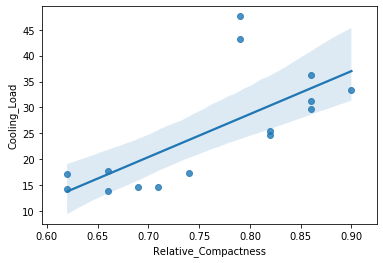

In [11]:
sns.regplot(x='Relative_Compactness', 
            y='Cooling_Load', data=simple_linear_reg_df)

In [12]:
#mean absolute error

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler()

In [15]:
normalised_df=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [16]:
features_df=normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])

In [17]:
heating_target=normalised_df['Heating_Load']

In [126]:
features_df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overrall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0


In [18]:
 from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(features_df,heating_target, test_size=0.3, random_state=1)

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
linear_model= LinearRegression()

In [102]:
linear_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
predicted_values=linear_model.predict(x_test)

In [104]:
predicted_values

array([0.18737793, 0.57922363, 0.74206543, 0.71447754, 0.75842285,
       0.24743652, 0.16662598, 0.60351562, 0.24780273, 0.54577637,
       0.31933594, 0.66064453, 0.69335938, 0.30505371, 0.18908691,
       0.71643066, 0.57043457, 0.31616211, 0.25915527, 0.74401855,
       0.69848633, 0.06970215, 0.60803223, 0.32556152, 0.21618652,
       0.7467041 , 0.33398438, 0.1829834 , 0.80114746, 0.26989746,
       0.6796875 , 0.73693848, 0.14221191, 0.28479004, 0.56079102,
       0.80700684, 0.33398438, 0.13635254, 0.72167969, 0.24914551,
       0.82165527, 0.15710449, 0.10852051, 0.16271973, 0.11621094,
       0.1517334 , 0.484375  , 0.68945312, 0.75390625, 0.71972656,
       0.10119629, 0.66589355, 0.09729004, 0.2487793 , 0.76501465,
       0.76953125, 0.73828125, 0.62719727, 0.1517334 , 0.30053711,
       0.18811035, 0.59570312, 0.6027832 , 0.765625  , 0.56848145,
       0.92321777, 0.68286133, 0.31994629, 0.67053223, 0.23791504,
       0.54382324, 0.24938965, 0.2331543 , 0.72229004, 0.28552

In [105]:
#mae

In [106]:
from sklearn.metrics import mean_absolute_error

In [107]:
mae=mean_absolute_error(y_test,predicted_values)

In [108]:
round(mae,3)

0.063

In [109]:
#r_squared

In [110]:
from sklearn.metrics import r2_score

In [111]:
r2=r2_score(y_test,predicted_values)

In [112]:
round(r2,3)

0.894

In [113]:
#rss

In [114]:
rss=np.sum(np.square(y_test - predicted_values))

In [115]:
round(rss,3)

1.822

In [116]:
#rmse

In [117]:
from sklearn.metrics import mean_squared_error

In [118]:
rmse=np.sqrt(mean_squared_error(y_test,predicted_values))

In [119]:
round(rmse,3)

0.089

In [120]:
def get_weights_df(model,feat,col_name):
    weigths=pd.Series(model.coef_,feat.columns).sort_values()
    weights_df=pd.DataFrame(weights).reset_index()
    weights_df.columns=['Feaures', col_name]
    weigths_df[col_name].round(3)
    return weights_df





In [124]:

linear_model_weights=get_weights_df(model,x_train,'Linear_Model_Weight')
ridge_weights_df=get_weights_df(ridge_reg,x_train,'Ridge_Weight')
lasso_weights_df=get_weights_df(lasso_reg,x_train,'Lasso_Weight')


NameError: name 'model' is not defined

In [122]:
final_weights=pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights=pd.merge(final_weights, lasso_weights_df, on='Features')

NameError: name 'linear_model_weights' is not defined

In [59]:
from sklearn.linear_model import Lasso

In [60]:
lasso_reg=Lasso(alpha=0.001)

In [61]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
from sklearn.linear_model import Ridge

In [66]:
ridge_reg=Ridge(alpha=0.5)

In [67]:
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)